In [1]:
import pandas as pd

import seaborn as sns

import numpy as np

import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

In [2]:
dataset = pd.read_csv("Titanic_Dataset[70].csv")

In [3]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
dataset.shape

(1309, 12)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


In [6]:
dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.377387,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.484918,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [7]:
#finding count of male and female
dataset['Sex'].value_counts()

male      843
female    466
Name: Sex, dtype: int64

In [8]:
 import seaborn as sns

<AxesSubplot:xlabel='Sex', ylabel='count'>

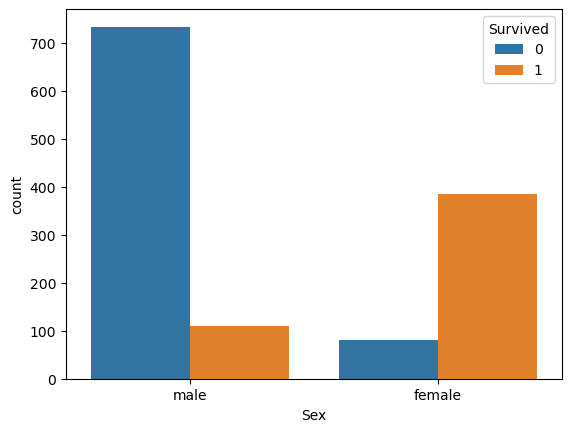

In [9]:
sns.countplot(x="Sex",hue="Survived",data=dataset)
#How many survived in each Gender

<AxesSubplot:xlabel='Pclass', ylabel='count'>

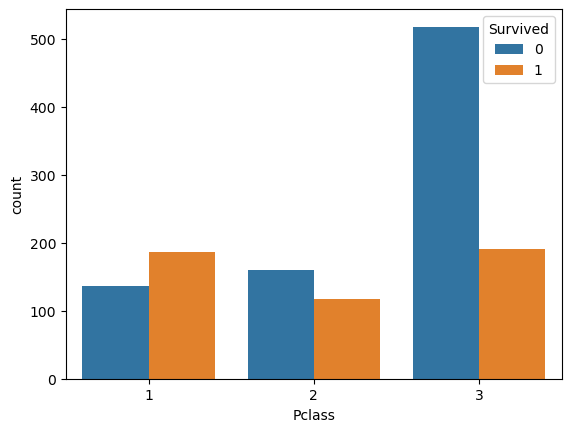

In [10]:
sns.countplot(x="Pclass",hue="Survived",data=dataset)
#How many survived based on class

<AxesSubplot:xlabel='Embarked', ylabel='count'>

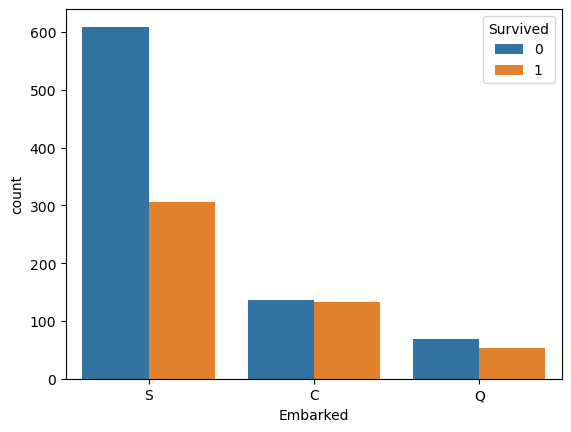

In [11]:
sns.countplot(x="Embarked",hue="Survived",data=dataset)
#how many survived based on Embarked

<AxesSubplot:xlabel='Pclass', ylabel='count'>

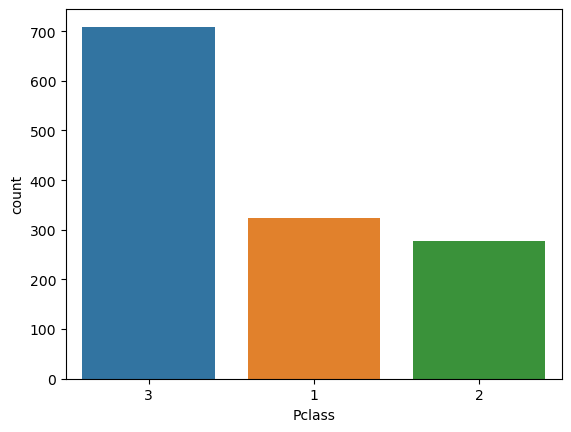

In [12]:
sns.countplot(x = 'Pclass', data=dataset, order = dataset['Pclass'].value_counts().index)
#count of each class

<AxesSubplot:xlabel='Embarked', ylabel='count'>

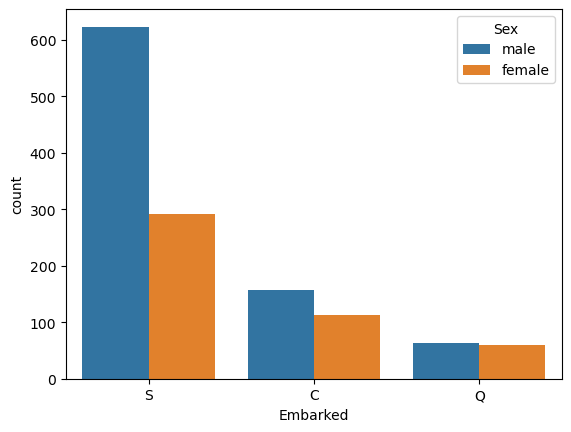

In [13]:
sns.countplot(x="Embarked",hue="Sex",data=dataset)
#how many genders based on Embarked

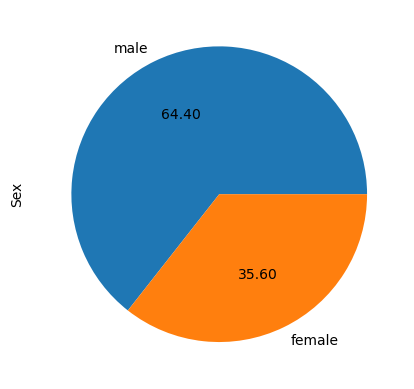

In [14]:
dataset['Sex'].value_counts().plot(kind="pie", autopct="%.2f")

plt.show()
#percentage of male and female of total passengers

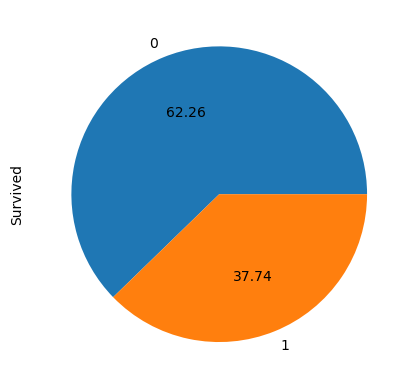

In [15]:
dataset['Survived'].value_counts().plot(kind="pie", autopct="%.2f")

plt.show()
#percentage of survived and not from total passengers

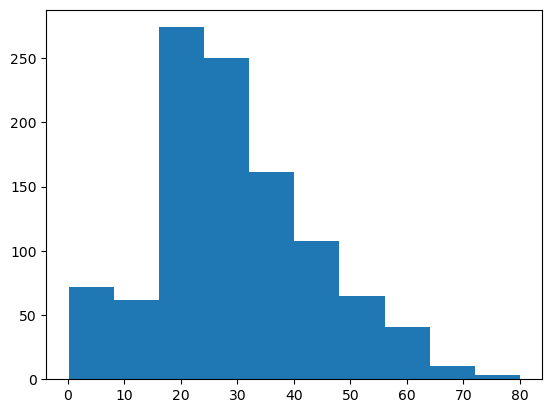

In [16]:
plt.hist(dataset['Age'], bins=10)

plt.show()

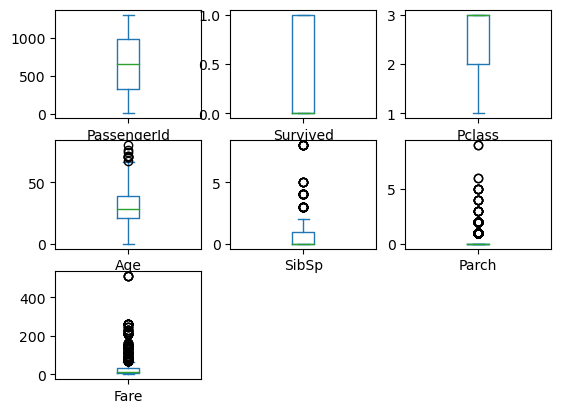

In [17]:
dataset.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False)

plt.show()

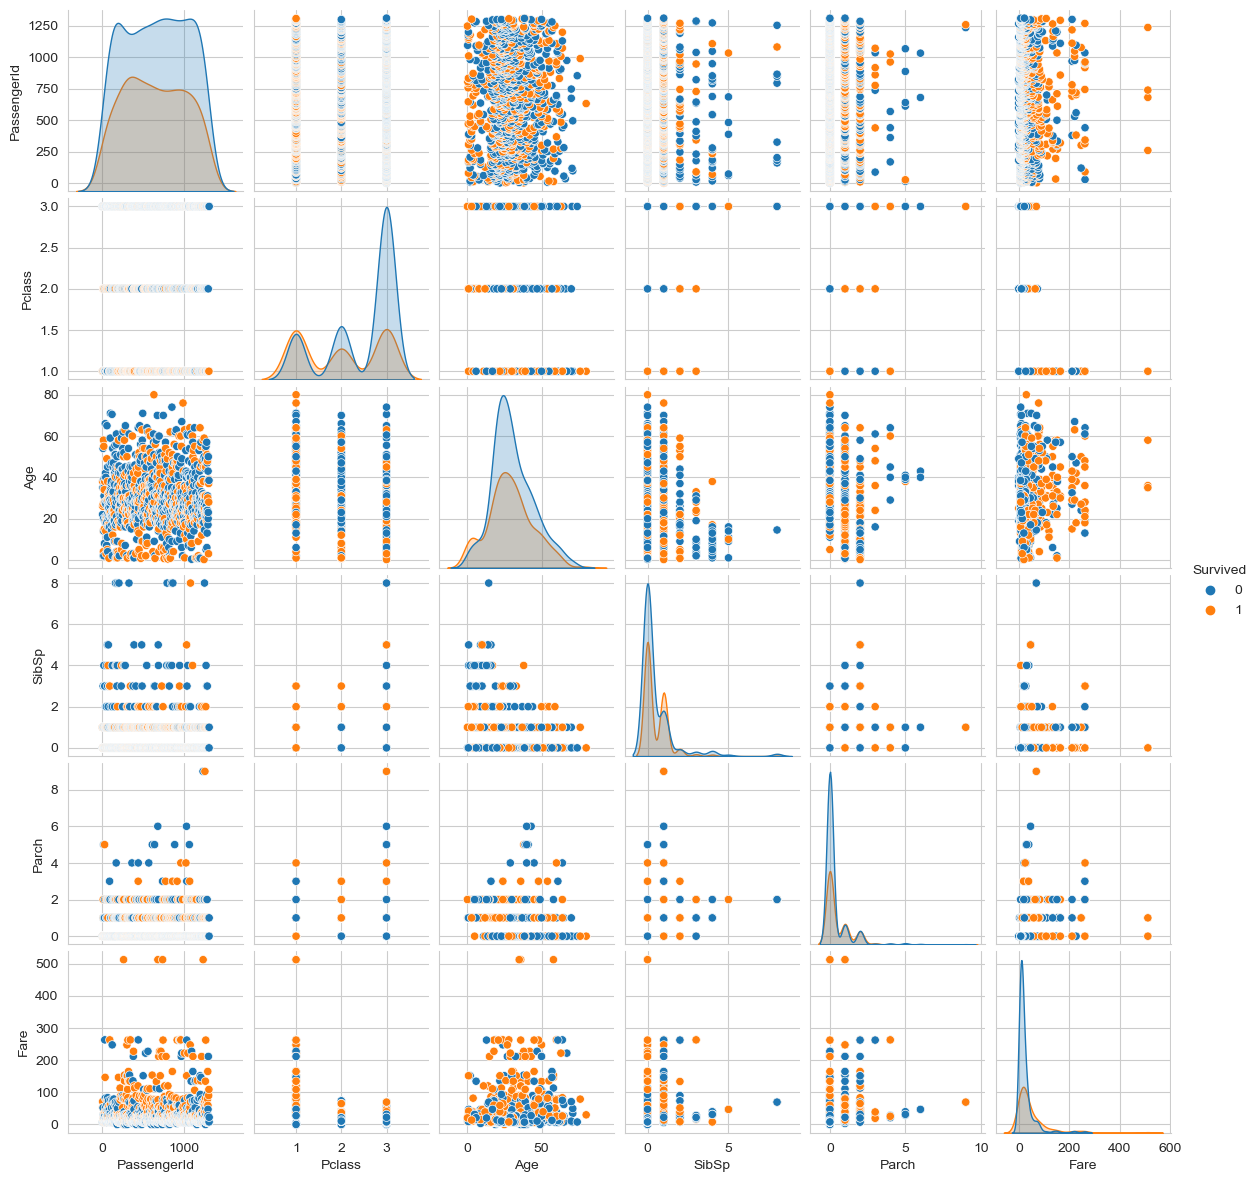

In [18]:
sns.set_style("whitegrid")
sns.pairplot(dataset, hue="Survived", height=2)
plt.show()

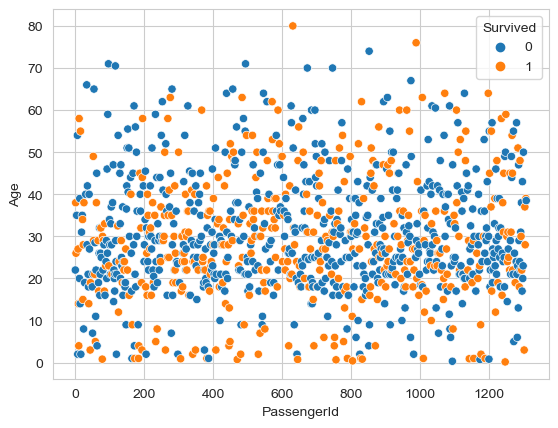

In [19]:
sns.scatterplot(data=dataset,x=dataset["PassengerId"], y=dataset["Age"], hue=dataset["Survived"])
plt.show()

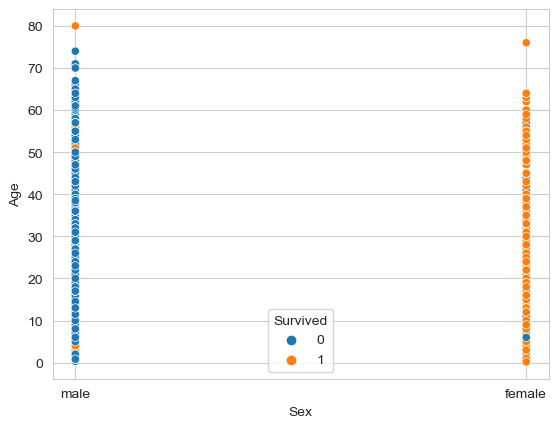

In [20]:
sns.scatterplot(data=dataset,x=dataset["Sex"], y=dataset["Age"], hue=dataset["Survived"])
plt.show()

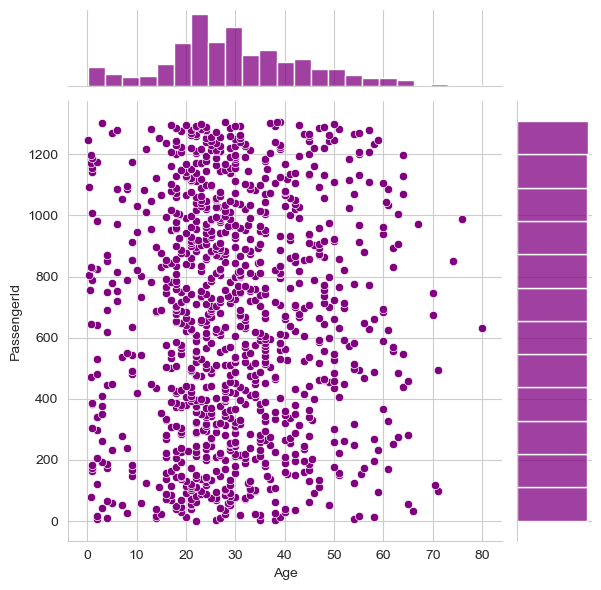

In [21]:
sns.jointplot(data=dataset, x='Age', y='PassengerId',color='purple')

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

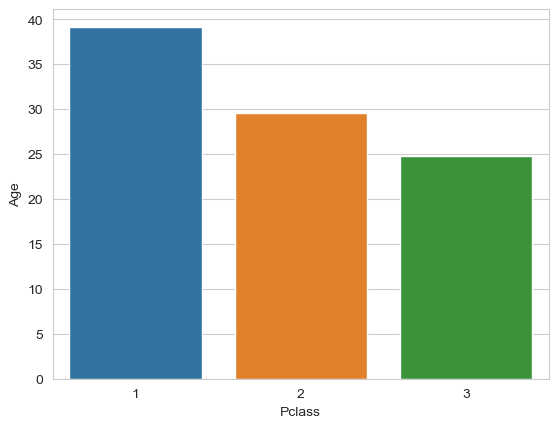

In [22]:
sns.barplot(data=dataset, x='Pclass',y='Age',ci=None)
#how many age class in each class

In [23]:
ds=dataset.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)

In [24]:
ds.shape

(1309, 8)

In [25]:
ds.groupby('Survived').size()

Survived
0    815
1    494
dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

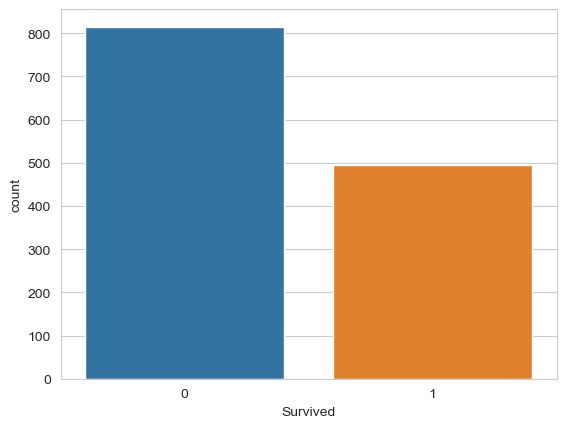

In [26]:
sns.countplot(x = 'Survived', data=ds, order = ds['Survived'].value_counts().index)

In [27]:
ds.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         263
SibSp         0
Parch         0
Fare          1
Embarked      2
dtype: int64

In [28]:
#Filling age with mean of age
ds['Age'].fillna(ds['Age'].mean(),inplace=True)

In [29]:
#filling fare with mean of fare
ds['Fare'].fillna(ds['Fare'].mean(),inplace=True)

In [30]:
#filling embarked with value"Unknown"
ds["Embarked"].fillna("Unknown", inplace=True) 

In [31]:
ds.isna().sum()
#checking for null value again

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [32]:
#finding category of Gender
ds['Sex'].unique()

array(['male', 'female'], dtype=object)

In [33]:
#mapping male =0,female 1
gen = {"male":0,'female':1}
ds['Sex'] = ds['Sex'].map(gen)

In [34]:
#finding category of gender
ds['Embarked'].unique()

array(['S', 'C', 'Q', 'Unknown'], dtype=object)

In [35]:
#mapping with numerical value
emb = {"Unknown":0,"S":1,'Q':2,'C':3}
ds['Embarked'] = ds['Embarked'].map(emb)

In [36]:
ds['Embarked'].value_counts()

1    914
3    270
2    123
0      2
Name: Embarked, dtype: int64

In [37]:
ds.groupby('Survived').size()

Survived
0    815
1    494
dtype: int64

In [38]:
from sklearn.utils import resample
#create two different dataframe of majority and minority class
sfalse = ds[(ds['Survived']==0)] #low assigned to a variable
strue = ds[(ds['Survived']==1)]

strue_upsampled = resample(strue,
                                 replace=True,    # sample with replacement
                                 n_samples= 815, # to match majority class
                                 random_state=42)  # reproducible results
                                  #average upsampled and assigned to another variable
                                  #ds avrage is upsampled, data is duplicated and sampled upto 1017(high) with a random state,


# Combine majority class with upsampled minority class
ds = pd.concat([sfalse,strue_upsampled]) # average and

In [39]:
ds.groupby('Survived').size()


Survived
0    815
1    815
dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

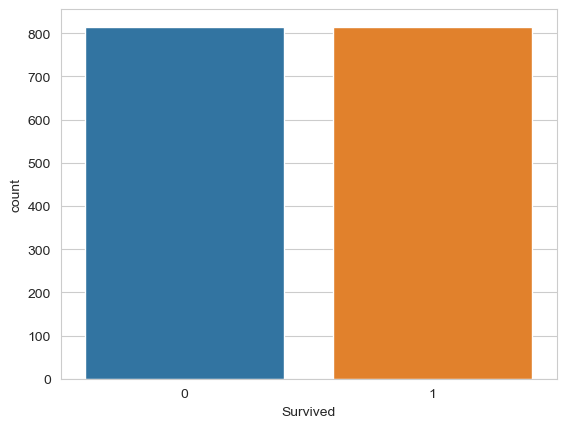

In [40]:
sns.countplot(x = 'Survived', data=ds, order = ds['Survived'].value_counts().index)

In [41]:
ds.duplicated().sum() 

612

In [42]:
ds.head(20)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.000000,1,0,7.2500,1
4,0,3,0,35.000000,0,0,8.0500,1
5,0,3,0,29.881138,0,0,8.4583,2
6,0,1,0,54.000000,0,0,51.8625,1
7,0,3,0,2.000000,3,1,21.0750,1
12,0,3,0,20.000000,0,0,8.0500,1
13,0,3,0,39.000000,1,5,31.2750,1
14,0,3,1,14.000000,0,0,7.8542,1
16,0,3,0,2.000000,4,1,29.1250,2
18,0,3,1,31.000000,1,0,18.0000,1


In [43]:
x=ds.iloc[:,1:].values #index 1 to end as features (Pclass to Embarked)
y=ds.iloc[:,0].values #0th as expected result (Survived or not)

In [44]:
x

array([[ 3.        ,  0.        , 22.        , ...,  0.        ,
         7.25      ,  1.        ],
       [ 3.        ,  0.        , 35.        , ...,  0.        ,
         8.05      ,  1.        ],
       [ 3.        ,  0.        , 29.88113767, ...,  0.        ,
         8.4583    ,  2.        ],
       ...,
       [ 2.        ,  0.        ,  8.        , ...,  1.        ,
        36.75      ,  1.        ],
       [ 3.        ,  1.        , 36.        , ...,  0.        ,
        17.4       ,  1.        ],
       [ 2.        ,  1.        , 29.88113767, ...,  0.        ,
        33.        ,  1.        ]])

In [45]:
y

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [46]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)

In [47]:
print("x_train: ",x_train.shape)
print("y_train: ",y_train.shape)
print("x_test: ",x_test.shape)
print("y_test: ",y_test.shape)

x_train:  (1141, 7)
y_train:  (1141,)
x_test:  (489, 7)
y_test:  (489,)


In [73]:
#Logistic Regression

from sklearn.metrics import accuracy_score
model_lr = LogisticRegression(max_iter = 600) #loading the algorith
model_lr.fit(x_train, y_train)
y_pred_lr = model_lr.predict(x_test)
print("Accuracy : ", accuracy_score(y_test, y_pred_lr)*100)

Accuracy :  84.86707566462167


In [74]:
#k neigbours Clssifier

from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier()
model_knn.fit(x_train,y_train)
y_pred_knn = model_knn.predict(x_test)

C:\Users\faris\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [75]:
print("Accuracy : ", accuracy_score(y_test, y_pred_knn)*100)

Accuracy :  71.16564417177914


In [77]:
#Desicion tree classifier

from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier()
model_dt.fit(x_train,y_train)
y_pred_dt = model_dt.predict(x_test)
print("Accuracy : ", accuracy_score(y_test, y_pred_dt)*100)

Accuracy :  84.25357873210633


In [52]:
#neive bayes 

from sklearn.naive_bayes import GaussianNB
model_nb = GaussianNB()
model_nb.fit(x_train,y_train)

y_pred_nb = model_nb.predict(x_test)
print("Accuracy : ", accuracy_score(y_test, y_pred_nb)*100)

Accuracy :  83.43558282208589


In [53]:
#support vector machine

from sklearn.svm import SVC
model_svc = SVC(gamma='auto')
model_svc.fit(x_train,y_train)
y_pred_svc = model_nb.predict(x_test)
print("Accuracy : ", accuracy_score(y_test, y_pred_svc)*100)

Accuracy :  83.43558282208589


In [91]:
#logistics and Desicion tree have almost same accuracy, here using highest Logistics

#class,(male 0, female 1) ,age,sibsp,parch,Fare,Embarked 
Xnew = [[1,1,50,0,2,100.00,3]]
ynew = model_lr.predict(Xnew)
print(ynew)

[1]
